In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:

# 2. Load Dataset
# Replace with your dataset file
df = pd.read_csv("/content/Housing.csv")

# Display first 5 rows
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop missing values (basic preprocessing)
df = df.dropna()

Dataset Preview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing Values:
price               0
area                0
bedrooms            0


--- Simple Linear Regression ---
MAE: 1474748.1337969352
MSE: 3675286604768.185
R2 Score: 0.27287851871974644
Intercept: 2512254.2639593435
Coefficient: 425.72984193878284


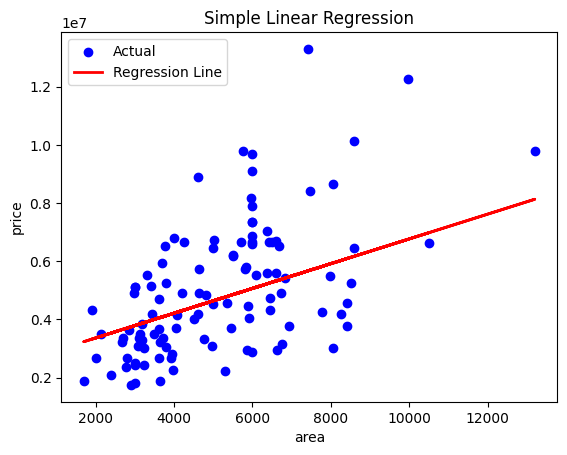

In [5]:
# SIMPLE LINEAR REGRESSION
# ================================

# Example: Predict Price using only Area
X_simple = df[['area']]       # Feature
y = df['price']               # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

# Train model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Predictions
y_pred_simple = simple_model.predict(X_test)

# Evaluation
print("\n--- Simple Linear Regression ---")
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("R2 Score:", r2_score(y_test, y_pred_simple))

# Coefficients
print("Intercept:", simple_model.intercept_)
print("Coefficient:", simple_model.coef_[0])

# Plot regression line
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred_simple, color='red', linewidth=2, label="Regression Line")
plt.xlabel("area")
plt.ylabel("price")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [6]:
# ================================
# MULTIPLE LINEAR REGRESSION
# ================================

# Example: Predict Price using multiple features
# Modify feature names according to your dataset
X_multi = df[['area', 'bedrooms', 'bathrooms']]

# Split dataset
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y, test_size=0.2, random_state=42
)

# Train model
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

# Predictions
y_pred_multi = multi_model.predict(X_test_m)

# Evaluation
print("\n--- Multiple Linear Regression ---")
print("MAE:", mean_absolute_error(y_test_m, y_pred_multi))
print("MSE:", mean_squared_error(y_test_m, y_pred_multi))
print("R2 Score:", r2_score(y_test_m, y_pred_multi))

# Coefficients
coeff_df = pd.DataFrame({
    "Feature": X_multi.columns,
    "Coefficient": multi_model.coef_
})
print("\nModel Coefficients:")
print(coeff_df)
print("Intercept:", multi_model.intercept_)

# ================================
# Interpretation
# ================================

print("\nInterpretation:")
print("• Each coefficient represents change in Price for 1 unit increase in feature.")
print("• Higher R2 means better model fit.")
print("• Lower MAE & MSE indicate better performance.")


--- Multiple Linear Regression ---
MAE: 1265275.6699454375
MSE: 2750040479309.0522
R2 Score: 0.4559299118872445

Model Coefficients:
     Feature   Coefficient
0       area  3.454666e+02
1   bedrooms  3.601977e+05
2  bathrooms  1.422320e+06
Intercept: 59485.379208717495

Interpretation:
• Each coefficient represents change in Price for 1 unit increase in feature.
• Higher R2 means better model fit.
• Lower MAE & MSE indicate better performance.
